<a href="https://colab.research.google.com/github/vovparya/Urban_University/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9E%D0%B1%D0%B7%D0%BE%D1%80_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D1%85_%D0%BD%D0%B0%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%98%D0%98_%D0%94_%D0%97_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашнее задание по теме "Обзор основных направлений ИИ"

Канни Эдж Детектор (Canny Edge Detector) — это один из самых известных и широко используемых алгоритмов для обнаружения границ в изображениях.


###Этапы работы Канни Эдж Детектора

1. **Сглаживание изображения (Noise Reduction)**: Первым шагом является применение гауссового фильтра для снижения шумов в изображении. Это делает границы более четкими.

2. **Градиентное преобразование (Gradient Computation)**: Вычисление градиентов изображения, чтобы определить направление и величину изменений интенсивности. Обычно используются операторы Собеля для этого этапа.

3. **Ненаправленное подавление (Non-Maximum Suppression)**: В этом этапе выделяются только те пиксели, которые являются локальными максимумами вдоль направления градиента. Это помогает избавиться от менее выраженных границ.

4. **Двойной порог (Double Thresholding)**: Установка двух пороговых значений для определения сильных и слабых границ. Пиксели, которые превышают высокий порог, считаются границами, а те, что между двумя порогами, будут проверены на связь с сильными границами.

5. **Связывание границ (Edge Tracking by Hysteresis)**: Связывание слабых границ с сильными для окончательного определения границ. Слабые границы, которые соединяются с сильными, считаются границами.

###Пример реализации Канни Эдж Детектора на Python

Вот пример кода на Python, который использует библиотеку OpenCV для реализации Канни Эдж Детектора:



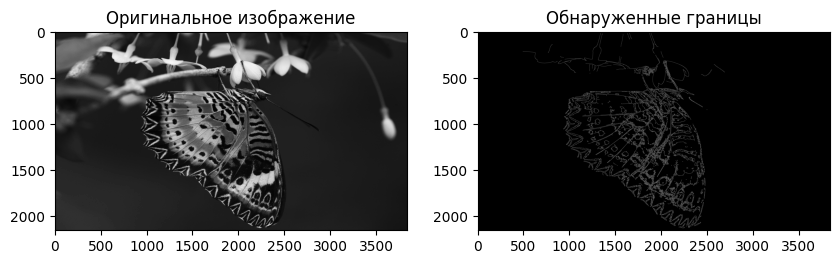

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/ED.jpg', cv2.IMREAD_GRAYSCALE)

# Применение гауссового фильтра для снижения шумов
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Применение Канни Эдж Детектора
edges = cv2.Canny(blurred_image, 50, 150)
# 50 и 150 - это  high threshold и low threshold —
# два пороговых значения, которые используются
# для определения сильных и слабых границ на изображении.

# Отображение результата
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Обнаруженные границы')
plt.imshow(edges, cmap='gray')

plt.show()

### Домашнее задание

Создайте текстовую ячейку в блокноте и напишите в ней свое понимание ответов на следующие вопросы:

1. **Объясните этапы работы Канни Эдж Детектора. Почему каждый этап важен для общего алгоритма?**   

2. **Как выбор значений для двойного порога (high и low threshold) влияет на результаты работы Канни Эдж Детектора?**
   - Поэксперементируйте с примером кода и опишите свои наблюдения.

3. **Используйте Канни Эдж Детектор для различных изображений и сравните результаты. **

4. **Используйте приведенный ниже код для визуализации градиентов в изображении. Подумайте: как можно использовать эти градиенты для других задач в компьютерном зрении?**

5. Сохраните свой блокнот, расшарьте его и направьте ссылку на ваш блокнот на проверку преподавателю.

#NB! Не забудьте загрузить в колаб изображения для тестирования (используйте фотографии из своих источников или интернета).
Замените в коде ссылки на изображения, использованные преподавателем, на ваши. Как это сделать - показано в лекции.


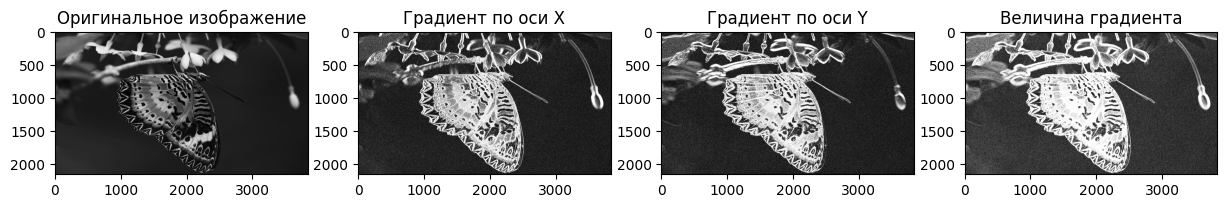

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/ED.jpg', cv2.IMREAD_GRAYSCALE)

# Применение оператора Собеля для вычисления градиентов по осям X и Y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Градиент по оси X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Градиент по оси Y

# Вычисление величины градиента
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Нормализация градиентов для отображения
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# Отображение результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Градиент по оси X')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Градиент по оси Y')
plt.imshow(sobel_y, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Величина градиента')
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()


# Решение Д.З.

**Объясните этапы работы Канни Эдж Детектора. Почему каждый этап важен для общего алгоритма?**

*Сглаживание изображения (Понижение шума)*, т.к. шумы могут приводить к ложным границам на изображении.Сглаживание помогает уменьшить влияние шумов и улучшает точноть обнаружения границ на последующих этапах.

*Вычисление градиентов яркости*
Используя операторы Собеля или схожие фильтры, вычисляются частные произовдные по осям X и Y, то есть градиенты изображения. Т.к. градинет показывает скорость изменения яркости в изображении. Места с высокими значениями градиента являются кандидатами на границы.

*Вычисление направления градиента*
Для каждого пикеля вычисляется направление(угол) градиента с использованием полученных градиентов по X и Y. Важно осознавать, что знание направлениия градиента позволяет точно определить, в каком направлении просиходит наибольшее изменение яркости. Это необходимо для последующего подавления немаксимумов.

*Подавление немаксимумов (Non-Maximum Suppression)*
Подавляются все пиксели, которые не являются локальными максимумами в направлении градиента. Этот шаг уменьшает толщину границ до 1 пикселя и устраняет неоднозначности, осталяя только пиксели, принадлежащие истинным границам.

*Двойная пороговая фильтрация (Double Thresholding)*
Применяются два порога - высокий и низкий:
Сильные пиксели отображают значения градиента выше высокого порога.
Слабые пиксели, отображают значения градиента между низким и высоким порогами.
Пиксели ниже низкого порога отбрасываются.
Данная фильтрация помогает отличить истинные границы от ложных, вызванных шумами или незначительными изменениями яркости.

*Трассировка границ с использованием гистерезиса*
Слабые пиксели включаюстя в границы, если они связаны с сильными пикселями. Это гарантирует, что границы будут непрерывными и завершенными, устраняя разрывы в линиях границ.

*Поэкспериментировав с кодом, пришел к выводу, что каждый из этих этапов критически важен для эффективности алгоритма Канни.*



**Как выбор значений для двойного порога (high и low threshold) влияет на результаты работы Канни Эдж Детектора?
Поэксперементируйте с примером кода и опишите свои наблюдения.**

Эксперимент с кодом ниже:



In [1]:
!pip install opencv-python

In [2]:
!pip install matplotlib

In [3]:
!pip install requests

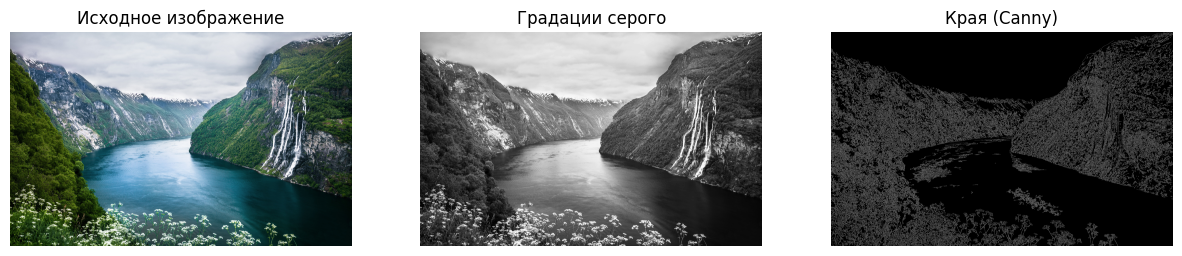

In [4]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt

# URL изображения
url = ('https://wallpaper.forfun.com/fetch/b6/'
       'b650e6d6b5aa5e33847057e031bf537c.jpeg')

# Загрузка изображения по URL
response = requests.get(url)
if response.status_code == 200:
    # Преобразование данных в массив байтов
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

    # Декодирование изображения с помощью OpenCV
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Проверка успешности декодирования
    if image is not None:
        # Преобразование из BGR в RGB для корректного отображения с Matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        print("Не удалось декодировать изображение.")
else:
    print("Не удалось загрузить изображение. Статус код:", response.status_code)


# Преобразование в градации серого
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Применение гауссового фильтра для снижения шумов
blurred_image = cv2.GaussianBlur(image_gray, (5, 5), 1.4)

# Применение Канни Эдж Детектора
edges = cv2.Canny(blurred_image, 10, 100)


# Отображение результатов
plt.figure(figsize=(15,5))

# Добавил еще и отображение исходной картинки
plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Исходное изображение')

plt.subplot(1,3,2)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Градации серого')

plt.subplot(1,3,3)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Края (Canny)')

plt.show()


# ...продолжение Д.З.

Двойное пороговое значение в алгоритме Канни используется для классификации пикселей и обеспечения надёжного обнаружения границ:

Низкий порог (Low Threshold): Определяет минимальное значение градиента, ниже которого пиксели не рассматриваются как часть границы. Низкий порог, позволяет обнаружить слабые границы. Но также может привести у величению ложных срабатываний из-за шума.

Высокий порог (High Threshold): Пиксели с градиентом выше этого значения считаются сильными кандидатами на границу. Высокий порог, уменьшает количество ложных границ, вызванных шумом. И как недостаток, могут быть пропущены слабые, но значимые границы (как с картинкой в примере, водопад не различим), если их градиент ниже порогового значения.



**Используйте приведенный ниже код для визуализации градиентов в изображении.**

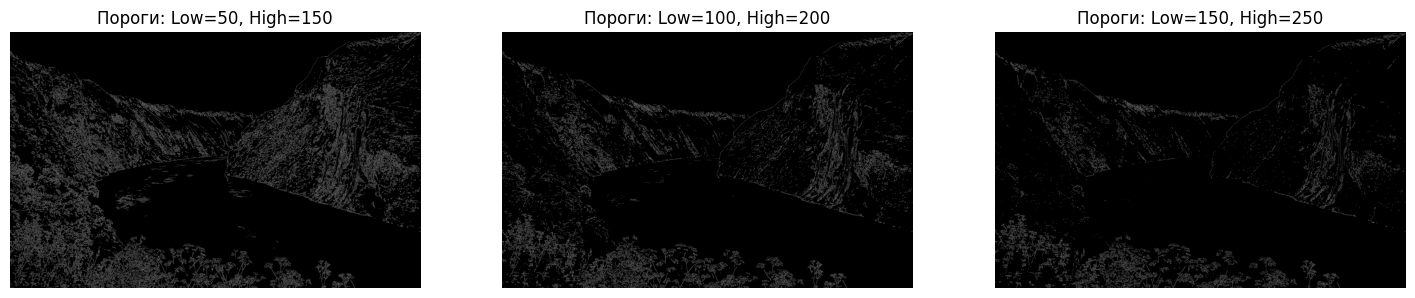

In [5]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt

# URL изображения
url = ('https://wallpaper.forfun.com/fetch/b6/'
       'b650e6d6b5aa5e33847057e031bf537c.jpeg')

# Загрузка изображения по URL
response = requests.get(url)
if response.status_code == 200:
    # Преобразование данных в массив байтов
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

    # Декодирование изображения с помощью OpenCV
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Проверка успешности декодирования
    if image is not None:
        # Преобразование из BGR в RGB для корректного отображения с Matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    else:
        print("Не удалось декодировать изображение.")
else:
    print("Не удалось загрузить изображение. Статус код:", response.status_code)


# Применение Гауссова размытия
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Список пар пороговых значений для эксперимента
thresholds = [(50, 150), (100, 200), (150, 250)]

plt.figure(figsize=(18, 6))

for i, (low, high) in enumerate(thresholds):
    # Применение Канни Эдж Детектора
    edges = cv2.Canny(blurred_image, low, high)

    # Отображение результатов
    plt.subplot(1, 3, i+1)
    plt.imshow(edges, cmap='gray')
    plt.title(f'Пороги: Low={low}, High={high}')
    plt.axis('off')

plt.show()

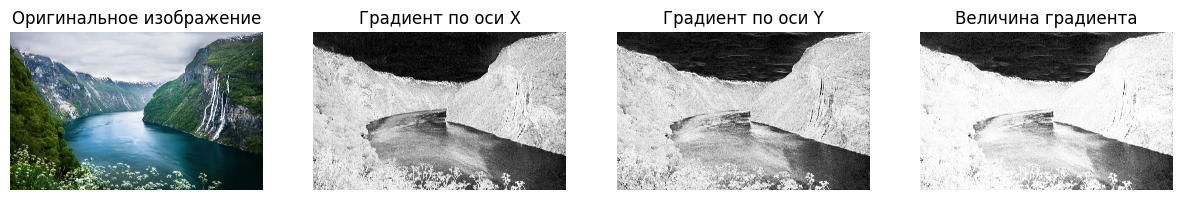

In [6]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt

# URL изображения
url = ('https://wallpaper.forfun.com/fetch/b6/'
       'b650e6d6b5aa5e33847057e031bf537c.jpeg')

# Загрузка изображения по URL
response = requests.get(url)
if response.status_code == 200:
    # Преобразование данных в массив байтов
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

    # Декодирование изображения с помощью OpenCV
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Проверка успешности декодирования
    if image is not None:
        # Преобразование из BGR в RGB для корректного отображения с Matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Преобразование в градации серого для обработки
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        print("Не удалось декодировать изображение.")
        exit()
else:
    print("Не удалось загрузить изображение. Статус код:", response.status_code)
    exit()

# Применение оператора Собеля для вычисления градиентов по осям X и Y
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=5)  # Градиент по оси X
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=5)  # Градиент по оси Y

# Вычисление величины градиента
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Нормализация градиентов для отображения
sobel_x_display = cv2.convertScaleAbs(sobel_x)
sobel_y_display = cv2.convertScaleAbs(sobel_y)
gradient_magnitude_display = cv2.convertScaleAbs(gradient_magnitude)

# Отображение результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Оригинальное изображение')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Градиент по оси X')
plt.imshow(sobel_x_display, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Градиент по оси Y')
plt.imshow(sobel_y_display, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Величина градиента')
plt.imshow(gradient_magnitude_display, cmap='gray')
plt.axis('off')

plt.show()


**Подумайте: как можно использовать эти градиенты для других задач в компьютерном зрении?**

*Оптический поток (Optical Flow):*

Градиенты по времени и пространству используются для оценки движения объектов между кадрами, что важно в видеонаблюдении и видеоанализе.

*Контроль и оценка текстуры:*

В промышленной автоматизации градиенты помогают в обнаружении дефектов поверхности и оценке качества продукции.